In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [75]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [76]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [77]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [78]:
train["KL_divergence"].unique()

array([0.        , 0.20187972, 0.36101632, 0.05513981, 0.1058702 ,
       0.2976192 , 0.598045  , 0.38529016, 0.18340425, 0.26008409,
       0.31567617, 0.77536269, 0.1888584 , 0.14573751, 0.62035099,
       0.46707164, 0.34906874, 0.47402839, 0.19633484, 0.14896383,
       0.4422892 , 0.43183313, 0.22472015, 0.47456784, 0.28727695,
       0.52821229, 1.36257008, 0.31593953, 0.25309715, 0.1095351 ,
       0.28952426, 0.12566992, 0.43474621, 0.14928908, 0.24450676,
       0.11433992, 0.1849325 , 0.18457052, 0.27329018, 0.12824081,
       0.20862615, 0.04929607, 0.198287  , 0.22331077, 0.49110358,
       0.32642206, 0.16911097, 0.1641035 , 0.12583492, 0.3599386 ,
       0.20908724, 0.14571609, 0.14796025, 0.29678274, 0.28251438,
       0.23227924, 0.14807146, 0.13136268, 0.13535481, 0.13519594,
       0.20657957, 0.27975519, 0.29129234, 0.21911707, 0.36596684,
       0.19227982, 0.12540313, 0.12235145, 0.0992985 , 0.16012701,
       0.14669149, 0.08026793, 0.30332692, 0.39507156, 0.19982

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

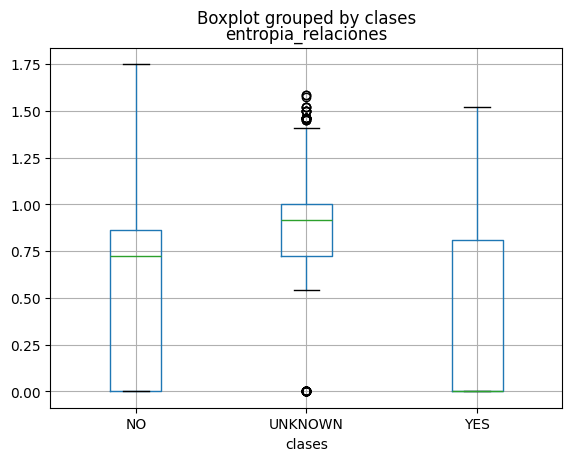

In [84]:
train.boxplot(by="clases",column="entropia_relaciones")

In [83]:
import scipy.stats as stats
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="UNKNOWN") | (train['clases']=="NO")][c]
    grupo_b = train[(train['clases']=="YES")][c]
    grupo_c = train[(train['clases']=="NO")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"UNKNOWN-YES")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"UNKNOWN-YES")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_b, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"YES-NO")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"YES-NO")
    
    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_c)

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        #print("Hay una diferencia significativa entre los grupos.",c,p_valor,"UNKNOWN-NO")
        pass
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c,"UNKNOWN-NO")

No hay evidencia de una diferencia significativa entre los grupos. distancias YES-NO
No hay evidencia de una diferencia significativa entre los grupos. entropia_total UNKNOWN-YES
No hay evidencia de una diferencia significativa entre los grupos. entropia_total YES-NO
No hay evidencia de una diferencia significativa entre los grupos. entropia_total UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los grupos. entropias YES-NO
No hay evidencia de una diferencia significativa entre los grupos. mutinf YES-NO
No hay evidencia de una diferencia significativa entre los grupos. mearts YES-NO
No hay evidencia de una diferencia significativa entre los grupos. max_info YES-NO
No hay evidencia de una diferencia significativa entre los grupos. max_info UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los grupos. sumas YES-NO
No hay evidencia de una diferencia significativa entre los grupos. sumas UNKNOWN-NO
No hay evidencia de una diferencia significativa entre los 

## Eliminar características

In [6]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,27,0.333333,0.000000,0,,0,,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,27,1.000000,0.000000,0,,0,,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,1,24,0.800000,0.201880,0,,0,,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,38,1.000000,0.000000,0,,0,,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,1,16,0.200000,0.187846,0,,0,,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,23,1.000000,0.000000,0,,0,,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,19,0.333333,0.000000,0,,0,,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,22,0.400000,0.000000,0,,0,,1.000000,NO


In [7]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,1,13,0.600000,0.361016,0,,0,,0.666667,YES
16,1.194796,2.150507,1.871465,3.934430,0.004554,0.285345,0.086827,4.511289,0.000972,0.795813,...,2,16,0.714286,0.183404,0,,0,,0.750000,YES
25,1.000015,2.497725,1.329141,3.887436,0.004578,0.291467,0.056309,4.530766,0.000806,0.822867,...,1,33,0.500000,0.620351,0,,0,,0.666667,YES
27,0.999965,2.116668,1.334679,3.875875,0.003966,0.090035,-0.004140,4.512243,0.000716,0.772509,...,1,13,0.000000,0.467072,0,,0,,0.333333,YES
31,1.137589,1.799492,1.713597,3.924461,0.006038,0.352919,0.089520,4.531622,0.000838,0.870584,...,1,23,0.600000,0.474028,0,,0,,0.333333,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.719385,2.069732,1.901506,4.077736,0.002682,0.741229,0.152642,4.444871,0.001061,0.823512,...,1,17,0.833333,0.480964,0,,0,,0.500000,YES
779,1.104601,2.043669,2.065451,3.936022,0.003553,0.389897,0.095154,4.585575,0.000379,0.912842,...,1,25,0.571429,0.197474,0,,0,,0.500000,YES
791,1.114817,2.180061,2.016876,3.949004,0.003593,0.378576,0.112196,4.460816,0.001039,0.815960,...,1,18,0.833333,0.599279,1,make,0,,0.250000,YES
794,1.175345,1.804722,1.674942,3.965707,0.004654,0.309267,0.078419,4.604040,0.000514,0.933495,...,1,27,0.769231,0.239718,0,,0,,0.600000,YES


In [8]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'verbT', 'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

# Integrar características

In [9]:
# train["mutinf"]=train["mutinf"]/train["mutinf_t"]
# train["max_info"]=train["max_info"]/train["max_info_t"]
# train["mearts"]=train["mearts"]/train["mearts_t"]
# #train["entropias"]=train["entropias"]/train["entropia_total"]
# train["sumas"]=train["sumas"]/train["sumas_t"]
# train["list_m"]=train["list_m"]/train["list_M"]
# train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)

In [81]:
train=train.drop(["verbT","verbH","KL_divergence"],axis=1)

In [11]:
# train["mearts"]=train["mearts"]*train["distancias"]
# train=train.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [12]:
#train = train[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.987293,0.000000,0.000000,0.000000,0.000000,0.000000,1.561414,0.000000,0.333333,...,0,0.000000,3,0,27,0.333333,0,0,0.500000,YES
1,0.000000,1.686665,0.000000,0.000000,0.000000,0.000000,0.000000,2.706102,0.000583,0.504683,...,0,0.000000,5,0,27,1.000000,0,0,0.333333,NO
2,0.999996,1.961847,2.177694,3.867700,0.006142,0.465936,0.078281,4.375355,0.001715,0.802840,...,0,0.721928,5,1,24,0.800000,0,0,0.250000,UNKNOWN
3,0.000000,2.096811,0.000000,0.000000,0.000000,0.000000,0.000000,4.503376,0.000000,1.000000,...,0,0.000000,4,0,38,1.000000,0,0,0.333333,YES
4,0.999966,1.949269,2.192006,3.937175,0.005018,0.381601,0.103429,3.631440,0.000719,0.676320,...,0,0.721928,5,1,13,0.600000,0,0,0.666667,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.899769,1.805037,3.849615,0.003770,0.329502,0.101549,3.587219,0.000579,0.665900,...,0,0.721928,5,1,16,0.200000,0,0,0.500000,UNKNOWN
796,0.000000,1.995458,0.000000,0.000000,0.000000,0.000000,0.000000,4.165892,0.000000,0.888889,...,0,0.000000,9,0,23,1.000000,0,0,0.666667,YES
797,0.000000,1.491480,0.000000,0.000000,0.000000,0.000000,0.000000,3.157142,0.000000,0.666667,...,0,0.000000,3,0,19,0.333333,0,0,0.500000,UNKNOWN
798,0.000000,1.666819,0.000000,0.000000,0.000000,0.000000,0.000000,3.808481,0.000000,0.800000,...,0,0.000000,5,0,22,0.400000,0,0,1.000000,NO


In [13]:
train.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [14]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [15]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [16]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,diferencias,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.065325,0.902692,0.961710,0.652664,0.674153,0.683044,0.057352,0.504593,-0.421162,...,0.520688,0.106254,0.841181,0.103283,0.573108,-0.086450,-0.363802,-0.029970,0.023692,-0.323362
entropia_total,0.065325,1.000000,0.145752,0.063912,0.034176,0.133199,0.218553,0.677205,-0.012829,0.505977,...,-0.008068,-0.019718,0.012906,0.124304,-0.041025,-0.033998,0.045180,0.073998,0.004959,0.076176
entropias,0.902692,0.145752,1.000000,0.952990,0.512478,0.861346,0.860752,0.044261,0.430086,-0.357608,...,0.519442,0.160321,0.862515,0.094424,0.586607,-0.059638,-0.371454,-0.012635,0.031910,-0.307475
mutinf,0.961710,0.063912,0.952990,1.000000,0.527953,0.804466,0.762559,0.055912,0.406313,-0.388462,...,0.492452,0.122367,0.857076,0.086563,0.564997,-0.047474,-0.355408,-0.022596,0.031902,-0.302173
mearts,0.652664,0.034176,0.512478,0.527953,1.000000,0.369475,0.370263,-0.041716,0.717240,-0.287724,...,0.362332,0.098864,0.551973,0.077779,0.385217,-0.071046,-0.236438,-0.044096,-0.000797,-0.246701
max_info,0.674153,0.133199,0.861346,0.804466,0.369475,1.000000,0.865238,0.043483,0.290194,-0.165738,...,0.343389,0.180534,0.701349,0.033649,0.413388,0.007911,-0.271876,0.017296,0.045869,-0.195276
sumas,0.683044,0.218553,0.860752,0.762559,0.370263,0.865238,1.000000,0.060712,0.298010,-0.173619,...,0.405745,0.146705,0.677112,0.043574,0.402512,-0.151793,-0.267709,0.003339,0.027930,-0.208450
mutinf_t,0.057352,0.677205,0.044261,0.055912,-0.041716,0.043483,0.060712,1.000000,-0.168912,0.717906,...,-0.115895,-0.061658,-0.086780,0.140210,-0.129564,0.080685,0.134337,0.067396,-0.008617,0.140247
mearts_t,0.504593,-0.012829,0.430086,0.406313,0.717240,0.290194,0.298010,-0.168912,1.000000,-0.560308,...,0.554819,0.174859,0.533360,0.045396,0.578648,-0.125613,-0.358525,-0.042431,-0.018753,-0.417221
max_info_t,-0.421162,0.505977,-0.357608,-0.388462,-0.287724,-0.165738,-0.173619,0.717906,-0.560308,1.000000,...,-0.531732,-0.086085,-0.511325,0.032974,-0.588028,0.120425,0.391704,0.062117,0.002037,0.431756


<Axes: >

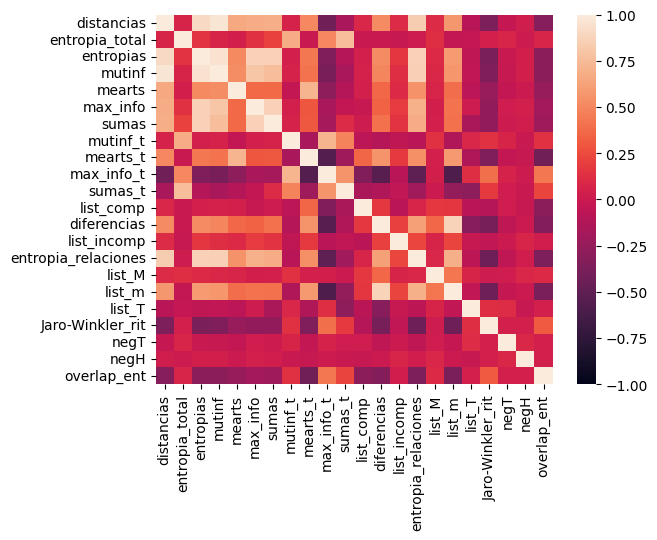

In [17]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [18]:
train_m

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,diferencias,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.065325,0.902692,0.961710,0.652664,0.674153,0.683044,0.057352,0.504593,-0.421162,...,0.520688,0.106254,0.841181,0.103283,0.573108,-0.086450,-0.363802,-0.029970,0.023692,-0.323362
entropia_total,0.065325,1.000000,0.145752,0.063912,0.034176,0.133199,0.218553,0.677205,-0.012829,0.505977,...,-0.008068,-0.019718,0.012906,0.124304,-0.041025,-0.033998,0.045180,0.073998,0.004959,0.076176
entropias,0.902692,0.145752,1.000000,0.952990,0.512478,0.861346,0.860752,0.044261,0.430086,-0.357608,...,0.519442,0.160321,0.862515,0.094424,0.586607,-0.059638,-0.371454,-0.012635,0.031910,-0.307475
mutinf,0.961710,0.063912,0.952990,1.000000,0.527953,0.804466,0.762559,0.055912,0.406313,-0.388462,...,0.492452,0.122367,0.857076,0.086563,0.564997,-0.047474,-0.355408,-0.022596,0.031902,-0.302173
mearts,0.652664,0.034176,0.512478,0.527953,1.000000,0.369475,0.370263,-0.041716,0.717240,-0.287724,...,0.362332,0.098864,0.551973,0.077779,0.385217,-0.071046,-0.236438,-0.044096,-0.000797,-0.246701
max_info,0.674153,0.133199,0.861346,0.804466,0.369475,1.000000,0.865238,0.043483,0.290194,-0.165738,...,0.343389,0.180534,0.701349,0.033649,0.413388,0.007911,-0.271876,0.017296,0.045869,-0.195276
sumas,0.683044,0.218553,0.860752,0.762559,0.370263,0.865238,1.000000,0.060712,0.298010,-0.173619,...,0.405745,0.146705,0.677112,0.043574,0.402512,-0.151793,-0.267709,0.003339,0.027930,-0.208450
mutinf_t,0.057352,0.677205,0.044261,0.055912,-0.041716,0.043483,0.060712,1.000000,-0.168912,0.717906,...,-0.115895,-0.061658,-0.086780,0.140210,-0.129564,0.080685,0.134337,0.067396,-0.008617,0.140247
mearts_t,0.504593,-0.012829,0.430086,0.406313,0.717240,0.290194,0.298010,-0.168912,1.000000,-0.560308,...,0.554819,0.174859,0.533360,0.045396,0.578648,-0.125613,-0.358525,-0.042431,-0.018753,-0.417221
max_info_t,-0.421162,0.505977,-0.357608,-0.388462,-0.287724,-0.165738,-0.173619,0.717906,-0.560308,1.000000,...,-0.531732,-0.086085,-0.511325,0.032974,-0.588028,0.120425,0.391704,0.062117,0.002037,0.431756


In [19]:
# Checar variables colineales
#sns.relplot(data=train_m, x="sumas", y="Jaro-Winkler_rit")

In [20]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    elif i == "UNKNOWN":
        y_train.append(2)
    else:
        y_train.append(0)

In [21]:
y_train.count(0)

80

In [22]:
y_train.count(1)

412

In [23]:
y_train.count(2)

308

In [24]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

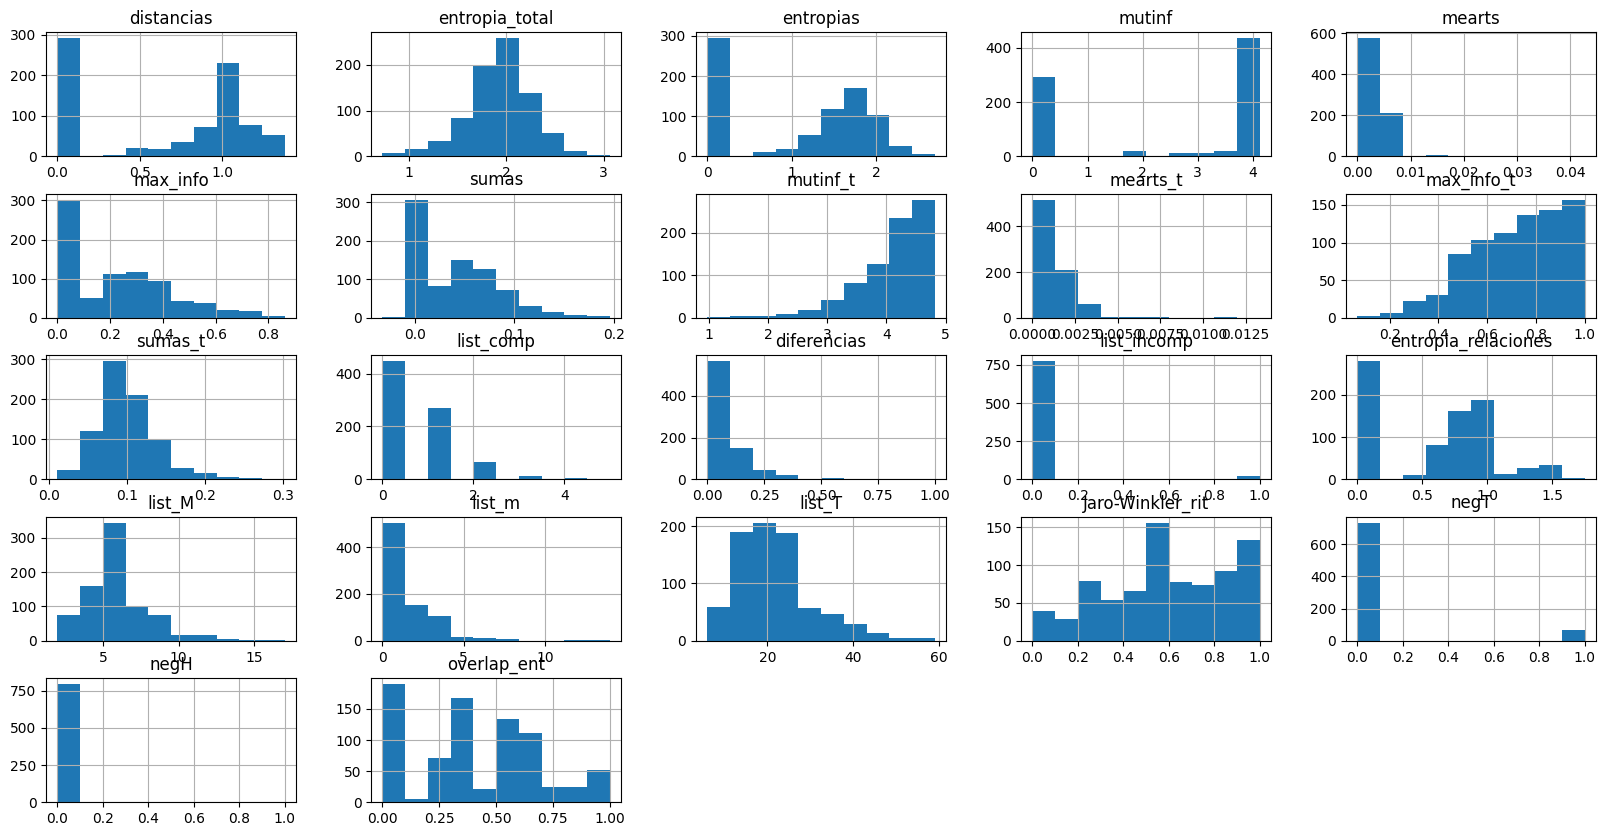

In [25]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [26]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [27]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,24,0.400000,0.000000,0,,0,,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,24,0.800000,0.000000,0,,0,,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,14,0.500000,0.000000,0,,0,,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,20,0.666667,0.000000,0,,0,,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,1,20,0.000000,0.597443,0,,0,,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,2,19,0.400000,0.167645,1,rush,0,,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,25,0.666667,0.000000,0,,0,,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,24,0.000000,0.000000,0,,0,,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,1,10,0.500000,0.339799,0,,0,,0.666667,UNKNOWN


In [28]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [29]:
# test["mutinf"]=test["mutinf"]/test["mutinf_t"]
# test["max_info"]=test["max_info"]/test["max_info_t"]
# test["mearts"]=test["mearts"]/test["mearts_t"]
# #test["entropias"]=test["entropias"]/test["entropia_total"]
# test["sumas"]=test["sumas"]/test["sumas_t"]
# test["list_m"]=test["list_m"]/test["list_M"]
# test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
#                   "mearts_t","sumas_t","list_M"],axis=1)
# #test=test.drop(["verbT","verbH","KL_divergence"],axis=1)
# test

In [30]:
# test["mearts"]=test["mearts"]*test["distancias"]
# test=test.drop(["distancias","list_incomp","negH","max_info"],axis=1)

In [31]:
test=test.drop(["verbT","verbH","KL_divergence"],axis=1)

In [32]:
test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

(39, 23)

In [33]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [34]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    elif i == "UNKNOWN":
        y_test.append(2)
    else:
        y_test.append(0)

In [35]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [36]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.32252207, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.55098802, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.72463906, 0.64088255, 0.80744617, ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.48722652, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.54450479, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.72464186, 0.61545887, 0.64046162, ..., 0.        , 0.        ,
        0.66666667]])

In [37]:
X_train.shape

(800, 22)

In [38]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [39]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
model.decision_function(X_train)

array([[-0.34564048,  0.85841461, -0.51277413],
       [-0.98339882,  1.29744048, -0.31404166],
       [-1.52330181,  1.0984666 ,  0.42483521],
       ...,
       [-0.38163626,  0.86839572, -0.48675946],
       [-0.31504791,  1.14116987, -0.82612196],
       [-1.19586905,  1.22977465, -0.0339056 ]])

In [41]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [42]:
model.classes_

array([0, 1, 2])

In [43]:
model.coef_[0]

array([-0.51016318, -0.08834413, -0.40024843,  0.38490181, -0.26993088,
       -0.21469446,  0.04352283, -0.56043214, -0.79059971,  0.1257816 ,
        0.12640397, -1.08059702, -0.17530218,  0.5424474 ,  0.28523886,
        0.08444112, -0.25110812, -0.85029206, -0.32708896,  0.56628281,
        0.9628879 ,  0.35151172])

In [44]:
coeficientes=model.coef_[0]

In [45]:
coeficientes

array([-0.51016318, -0.08834413, -0.40024843,  0.38490181, -0.26993088,
       -0.21469446,  0.04352283, -0.56043214, -0.79059971,  0.1257816 ,
        0.12640397, -1.08059702, -0.17530218,  0.5424474 ,  0.28523886,
        0.08444112, -0.25110812, -0.85029206, -0.32708896,  0.56628281,
        0.9628879 ,  0.35151172])

In [46]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  20 negH 11 list_comp


In [47]:

n_columns=train.shape[1]-1

In [48]:
n_columns

22

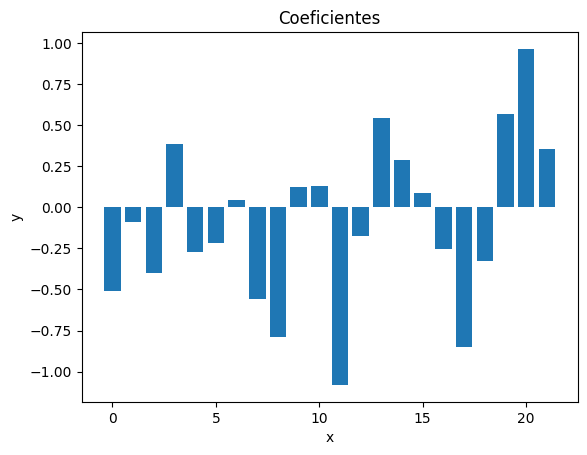

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [50]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.75516378, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.70031418, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.5972915 , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.61881135, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.96462865, 0.59797602, 0.32312239, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.85923413, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [51]:
X_test.shape

(800, 22)

In [52]:
predictions = model.predict(X_test)

In [53]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,

In [54]:
test["predicciones"]=predictions
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0.000000,5,0,24,0.400000,0,0,0.666667,YES,1
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0.000000,5,0,24,0.800000,0,0,0.333333,YES,1
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0.000000,4,0,14,0.500000,0,0,0.666667,YES,1
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0.000000,6,0,20,0.666667,0,0,1.000000,YES,1
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,0.811278,4,1,20,0.000000,0,0,1.000000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,0.721928,5,2,19,0.400000,1,0,0.500000,YES,1
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0.000000,6,0,25,0.666667,0,0,0.333333,NO,1
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0.000000,3,0,24,0.000000,0,0,0.666667,UNKNOWN,1
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,0.811278,4,1,10,0.500000,0,0,0.666667,UNKNOWN,1


In [55]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
288,0.97496,2.179237,1.833206,3.655588,0.004999,0.513491,0.116459,4.251613,0.001577,0.805396,...,0.970951,5,2,10,0.6,1,1,0.75,YES,0


In [56]:
print(confusion_matrix(y_test, predictions))

[[  0  59  13]
 [  1 338  71]
 [  0 129 189]]


In [57]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.66
precision:  0.6
recall 0.66
f1_score:  0.62
matthews_score:  0.37


In [236]:
# acccuracy:  0.66
# precision:  0.65
# recall 0.66
# f1_score:  0.63
# matthews_score:  0.36

In [237]:
# [[  1  52  19]
#  [  2 300 108]
#  [  0 111 207]]
#  acccuracy:  0.64
# precision:  0.61
# recall 0.64
# f1_score:  0.61
# matthews_score:  0.33

In [58]:
X_train.shape

(800, 22)

In [59]:
X_test.shape

(800, 22)

In [60]:
test=test.drop(["predicciones"],axis=1)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,2.230984,0.000000,0.000000,0.000000,0.000000,0.000000,4.434350,0.000691,0.858036,...,0,0.000000,5,0,24,0.400000,0,0,0.666667,YES
1,0.000000,2.068941,0.000000,0.000000,0.000000,0.000000,0.000000,4.429481,0.000576,0.885372,...,0,0.000000,5,0,24,0.800000,0,0,0.333333,YES
2,0.000000,1.764581,0.000000,0.000000,0.000000,0.000000,0.000000,3.155371,0.000000,0.750000,...,0,0.000000,4,0,14,0.500000,0,0,0.666667,YES
3,0.000000,2.011711,0.000000,0.000000,0.000000,0.000000,0.000000,3.957290,0.000000,0.833333,...,0,0.000000,6,0,20,0.666667,0,0,1.000000,YES
4,1.000001,1.690627,1.860964,3.880129,0.004272,0.201056,0.060806,3.339943,0.000845,0.550264,...,0,0.811278,4,1,20,0.000000,0,0,1.000000,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.841464,2.198445,2.205827,3.861241,0.004049,0.631889,0.131074,4.383406,0.001461,0.852755,...,1,0.721928,5,2,19,0.400000,1,0,0.500000,YES
796,0.000000,1.580490,0.000000,0.000000,0.000000,0.000000,0.000000,3.178976,0.000000,0.666667,...,0,0.000000,6,0,25,0.666667,0,0,0.333333,NO
797,0.000000,1.828157,0.000000,0.000000,0.000000,0.000000,0.000000,4.789178,0.000000,1.000000,...,0,0.000000,3,0,24,0.000000,0,0,0.666667,UNKNOWN
798,1.319180,1.766603,0.881291,3.781196,0.005778,0.129923,0.036628,4.466536,0.001000,0.782481,...,0,0.811278,4,1,10,0.500000,0,0,0.666667,UNKNOWN


In [61]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [62]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.680000 (0.122123)
Logistic Regression Precision:: 0.620000 (0.166303)
Logistic Regression Recall:: 0.680000 (0.122123)
Logistic Regression F1-score:: 0.640000 (0.155020)


In [ ]:
# Logistic Regression Acurracy:: 0.680000 (0.118972)
# Logistic Regression Precision:: 0.620000 (0.168867)
# Logistic Regression Recall:: 0.680000 (0.118972)
# Logistic Regression F1-score:: 0.630000 (0.154400)

In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s


Logistic Regression Precision:: 0.470000 (0.139364)
Logistic Regression Recall:: 0.480000 (0.079836)
Logistic Regression F1-score:: 0.450000 (0.098743)


In [65]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.680000 (0.112265)
Logistic Regression Recall:: 0.680000 (0.112265)
Logistic Regression F1-score:: 0.680000 (0.112265)


In [66]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.380000 (0.243237)


In [67]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [248]:
#linear_model

In [249]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [68]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.64      0.82      0.72       410
           2       0.69      0.59      0.64       318

    accuracy                           0.66       800
   macro avg       0.44      0.47      0.45       800
weighted avg       0.60      0.66      0.62       800



In [251]:
#     precision    recall  f1-score   support

#            0       0.50      0.03      0.05        72
#            1       0.65      0.80      0.72       410
#            2       0.67      0.62      0.65       318

#     accuracy                           0.66       800
#    macro avg       0.61      0.48      0.47       800
# weighted avg       0.65      0.66      0.63       800

In [ ]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [252]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'negT', 'negH'],
      dtype='object')

In [253]:
explainer.expected_value

array([-1.00322711,  0.56199729,  0.44122982])

In [254]:
X_test

array([[0.        , 0.75516378, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.70031418, 0.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.        , 0.5972915 , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.        , 0.61881135, 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.96462865, 0.59797602, 0.32312239, ..., 0.        , 0.        ,
        0.66666667],
       [0.        , 0.85923413, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [258]:
shap.plots.beeswarm(shap_values[:,:,0])

IndexError: list index out of range

In [259]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.73121437 0.4449395  0.54671232 0.89697426 0.12872182 0.27823834
 0.09448722 0.74559537 0.05217773 0.64995841 0.19549815 0.
 0.05454545 0.         0.29411765 0.11111111 0.39285714 0.8
 0.         0.         0.33333333] 2 1


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.         0.57687511 0.         0.         0.         0.
 0.         0.75079963 0.         0.79999987 0.21699325 0.
 0.         0.         0.29411765 0.         0.42857143 1.
 0.         0.         0.66666667]


IndexError: index 20 is out of bounds for axis 0 with size 20

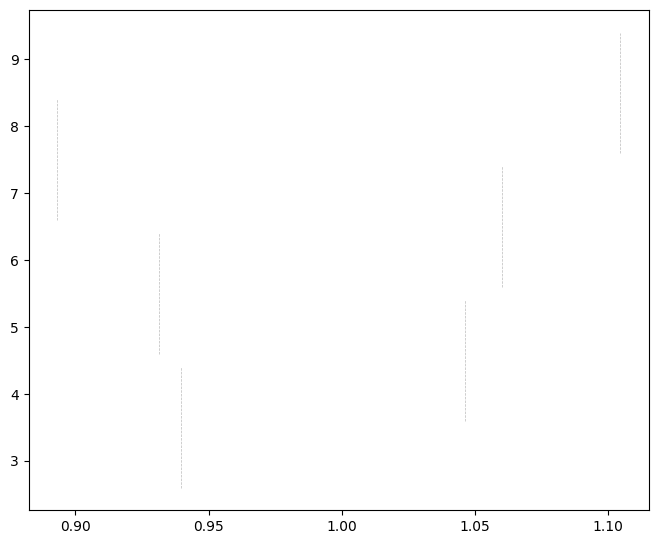

In [260]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

IndexError: index 20 is out of bounds for axis 0 with size 20

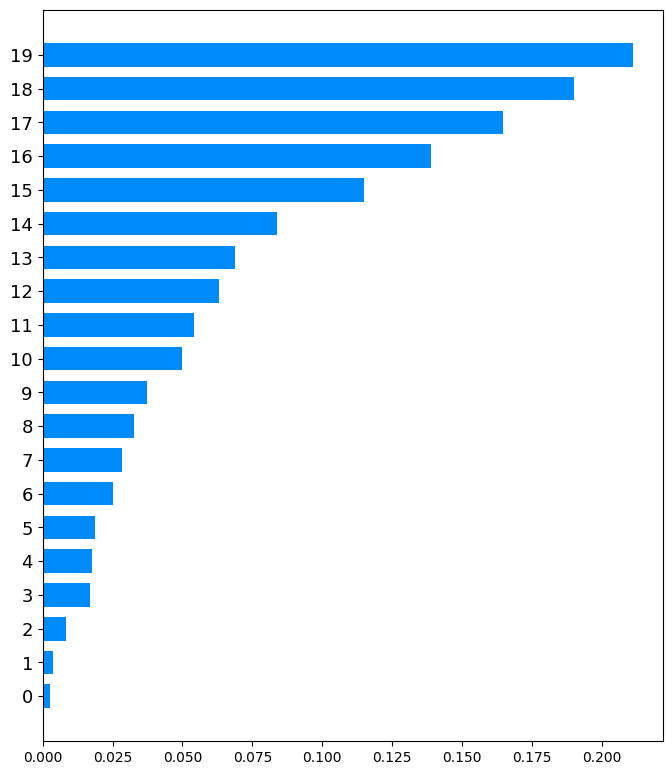

In [261]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

IndexError: index 20 is out of bounds for axis 0 with size 20

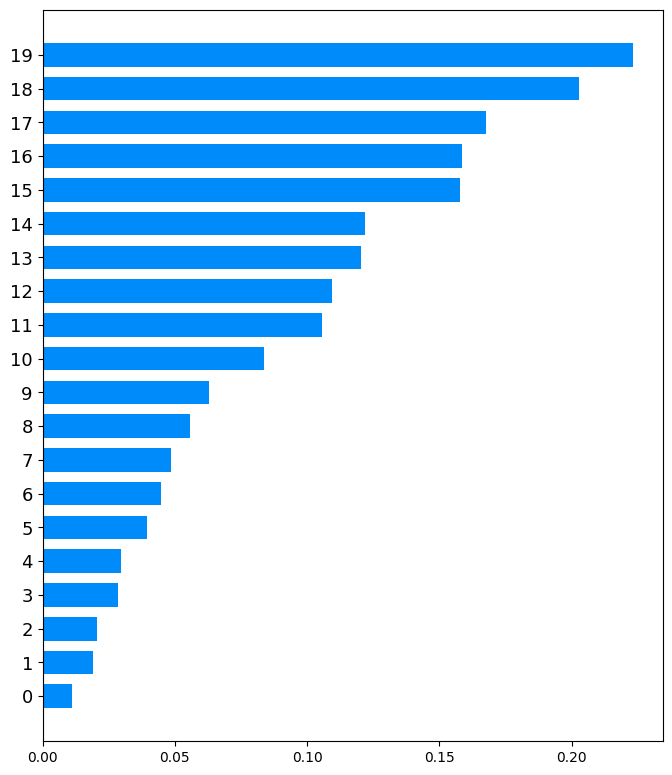

In [262]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

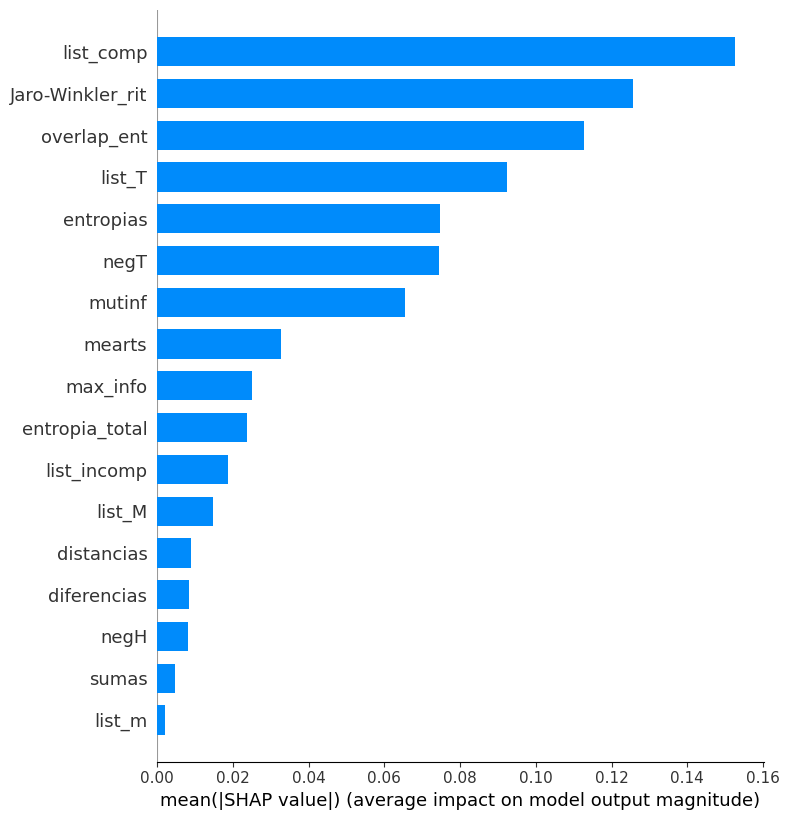

In [73]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

In [263]:
shap.summary_plot(shap_values[:,:1], X_test[1:,])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

IndexError: index 799 is out of bounds for axis 0 with size 798

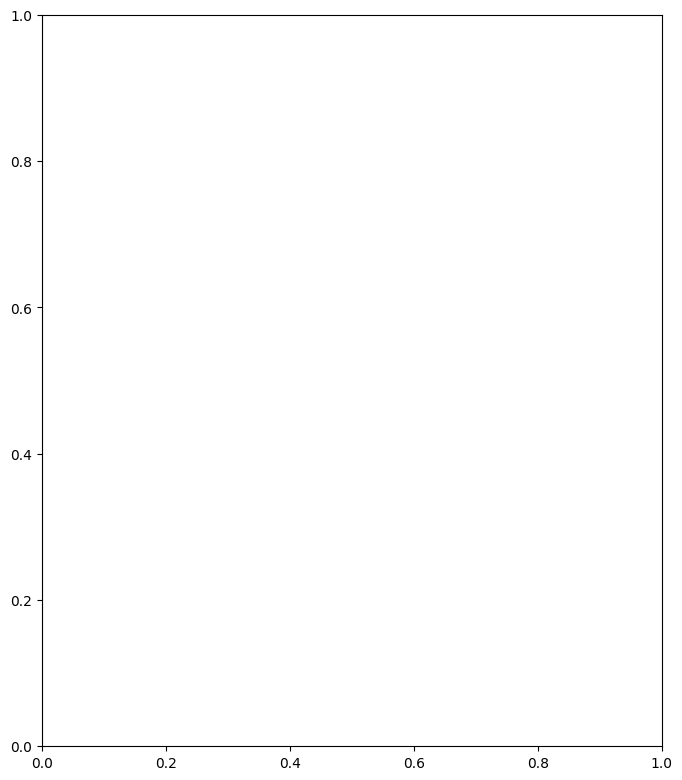

In [264]:
shap.summary_plot(shap_values[:,:,1], X_test[:-2],feature_names=test.columns[:-2])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

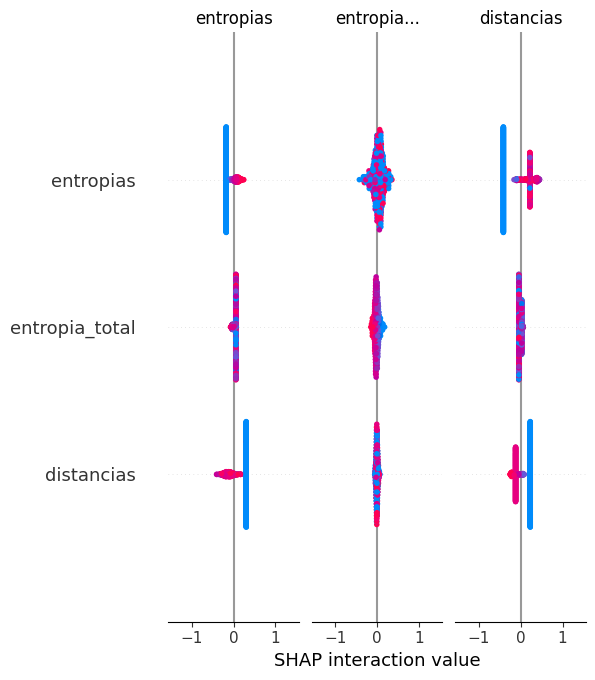

In [265]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


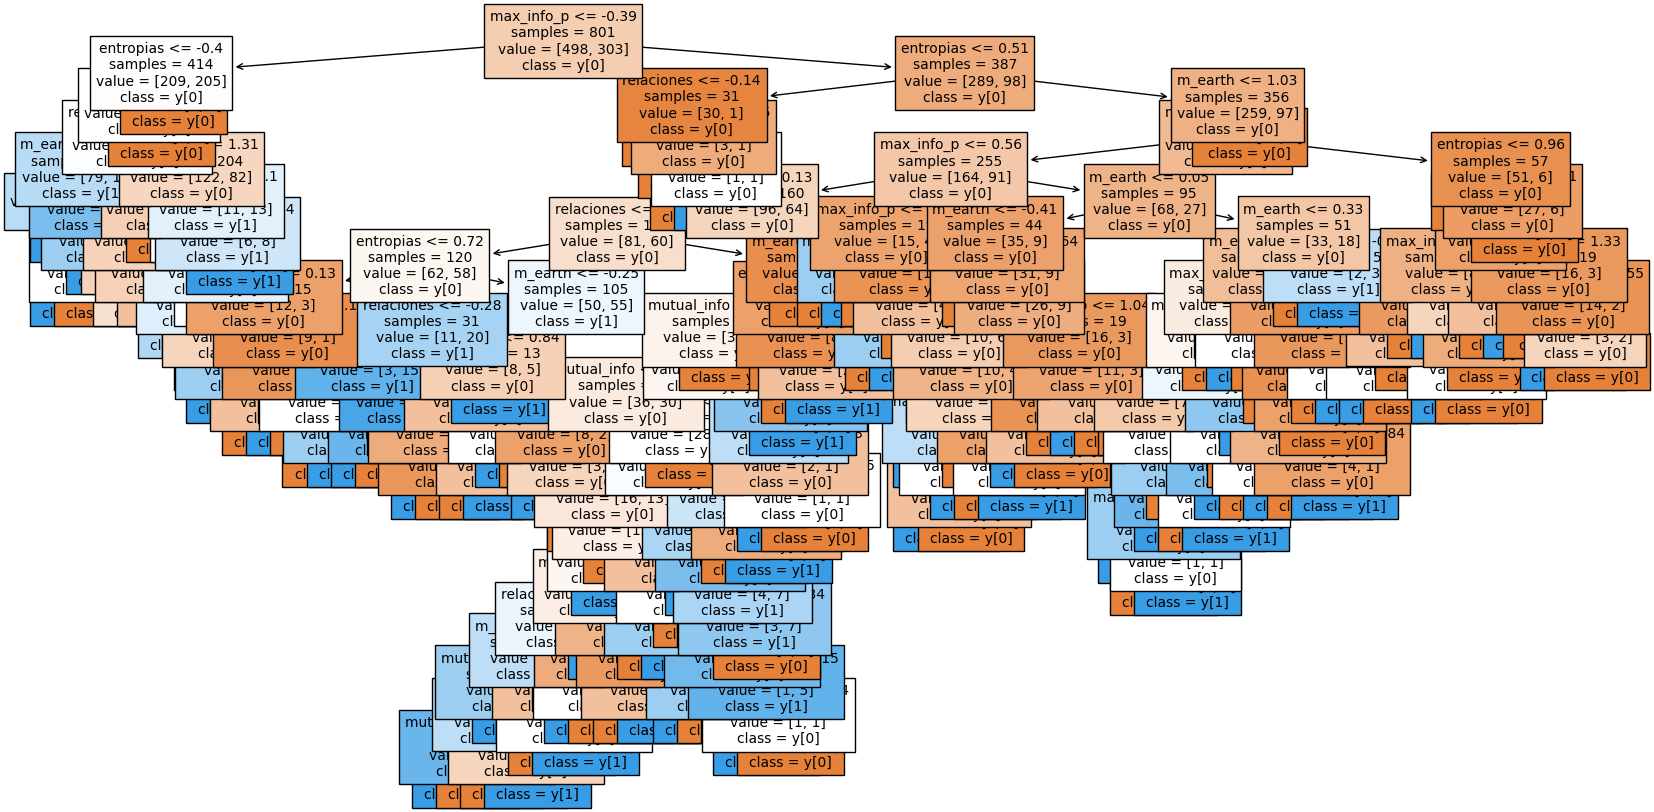

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )